In [18]:
import networkx as nx

# for drawing
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout


In [25]:

def general_neighborhood(G, k, x):
    # If x is not in G, raise a KeyError with an error message
    if x not in G:
        raise KeyError(f'Oops, there is no node with label "{x}" in the graph')

    # Using DFS(depth first search) to find nodes within distance k of x
    stack = [(x, 0)]
    visited = {x}
    neighbors = {x}  
    while stack:
        u, d = stack.pop()  # Pop the last element of the DFS stack
        if d < k:  # If the depth of the popped node is less than k
            for v in G[u]:  # Iterating over the neighbors of the popped node u
                if v not in visited:  
                    # Adding the neighbor v to the set of visited nodes
                    visited.add(v)
                    # we apend the neighbor v onto the DFS stack with a depth of d+1
                    stack.append((v, d+1))
                    # finally, we add the neighbor v to the set of neighbors
                    neighbors.add(v)

    #  returning a list of the set of neighbors 
    return list(neighbors)


In [26]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 2)])
print(general_neighborhood(G, 2, 1))  # Output: [1, 2, 3, 4]
print(general_neighborhood(G, 1, 3))  # Output: [3, 4, 2]
# Raises KeyError: Oops, there is no node with label "5" in the graph
#print(general_neighborhood(G, 3, 5))


[1, 2, 3, 4]
[3, 4]


In [28]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (1,3), (4, 2), (6, 1), (2, 5), (5, 8), (3,7)])
print(general_neighborhood(G, 2, 1)) 
#print(general_neighborhood(G, 3, 1))
print(general_neighborhood(G, 2, 9))  

[1, 2, 3, 5, 7]


KeyError: 'Oops, there is no node with label "9" in the graph'

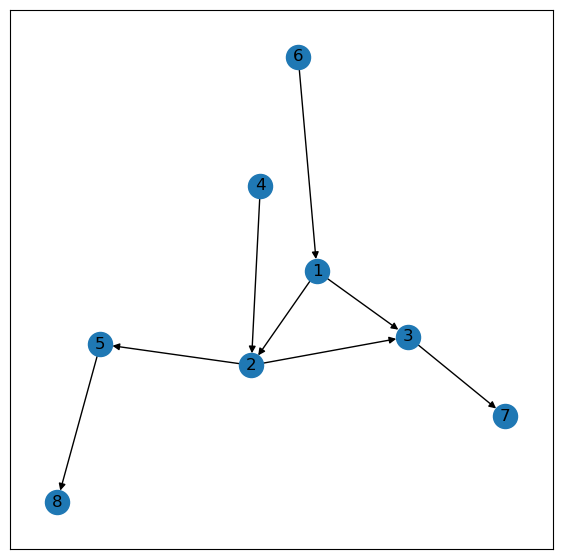

In [14]:
plt.figure(figsize=(7,7))
#pos = nx.circular_layout(D)
pos = graphviz_layout(G, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(G,with_labels = True)

KeyError: 'Oops, there is no node with label "9" in the graph'

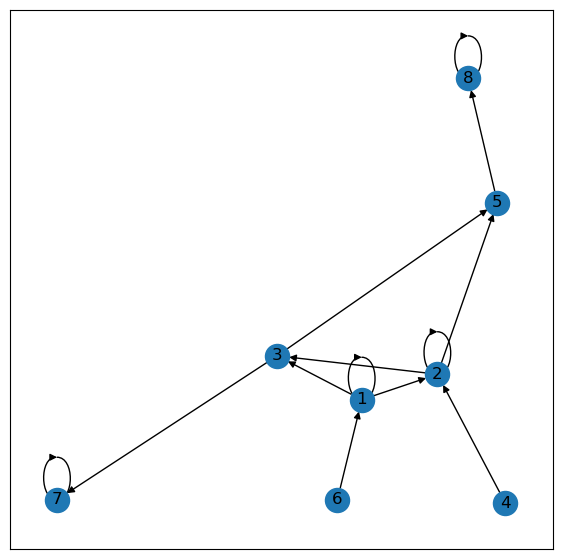

In [34]:
G.add_edges_from([(2,3), (3,5), (7,7),(2,2), (8,8), (1,1) ])
plt.figure(figsize=(7,7))
#pos = nx.circular_layout(D)
pos = graphviz_layout(G, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(G,with_labels = True)
print(general_neighborhood(G, 2, 9))


In [35]:


def is_transitive(G):
    """
    Checking whether a given directed graph object G is transitive or not.
    """
    for x in G.nodes():
        for y in G.successors(x):
            for z in G.successors(y):
                if z not in G.successors(x):
                    return False
    return True


In [36]:
print(is_transitive(G))


False


In [38]:
P= nx.DiGraph()
P.add_edges_from([(2, 3, 5, 7, 8), (3, 5, 7, 8), (7),(8)])
print(is_transitive(P))


NetworkXError: Edge tuple (2, 3, 5, 7, 8) must be a 2-tuple or 3-tuple.

In [40]:
import networkx as nx


def transitive_closure(G):
    """
    Returns the transitive closure graph of the input directed graph G.
    """
    T = nx.DiGraph(G)  # creating an object for a copy of G

    # Iterate over all pairs of nodes in G
    for u in G.nodes():
        for v in G.nodes():
            # Check if there is a path from u to v in G
            if nx.has_path(G, u, v):
                # Add an edge from u to v in T
                T.add_edge(u, v)

    return T


DiGraph with 7 nodes and 24 edges


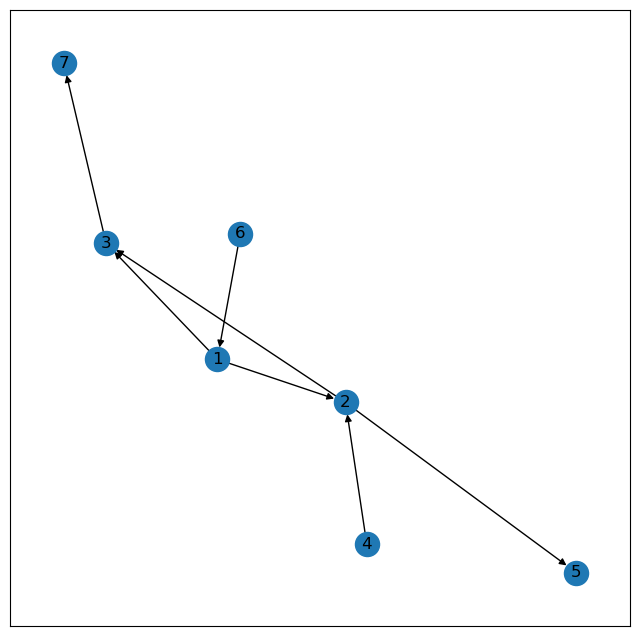

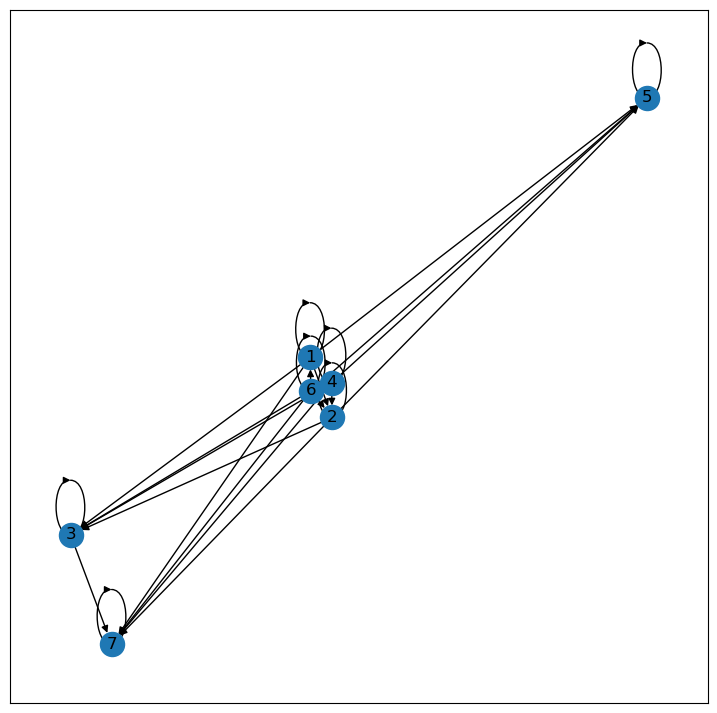

In [44]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3), (2,3), (3,7), (4,2), (6,1), (2,5)])
plt.figure(figsize=(8,8))
#pos = nx.circular_layout(D)
pos = graphviz_layout(G, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(G,with_labels = True)
print(transitive_closure(G))
T = transitive_closure(G)
plt.figure(figsize=(9,9))
#pos = nx.circular_layout(D)
pos = graphviz_layout(T, prog="dot") #dot draws graphs as hierarchies
nx.draw_networkx(T,with_labels = True)